<a href="https://colab.research.google.com/github/zahra-ynp/MLOperation-FinalProject/blob/main/MLOperatin_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Data Exploration and Validation

In [1]:
# The following packages are required for the project. Uncomment the lines below to install them if needed.

# %pip install matplotlib
# %pip install numpy
# %pip install pandas
# %pip install seaborn
# %pip install scikit-learn
# %pip install imblearn
# %pip install shap
# %pip install optuna
# %pip install neptune
# %pip install neptune-sklearn
# %pip install python-dotenv

1.1: Load and Inspect the Dataset

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from datetime import datetime
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [3]:
# Load the dataset
file_path = "../data/HR.csv"
data = pd.read_csv(file_path)

print("\nFirst 5 Rows of the Dataset:")
print(data.head())

print("\nDataset Info:")
print(data.info())

print("\nDataset Describe:")
print(data.describe())

print("\nUnique Values per Column:")
print(data.nunique())



First 5 Rows of the Dataset:
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  mediu

In [4]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


1.2 Handle Missing Values


In [5]:
missing_values = data.isnull().sum()
print("\nMissing Values per Column:")
print(missing_values)


Missing Values per Column:
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


1.3: Analyze and Visualize Features


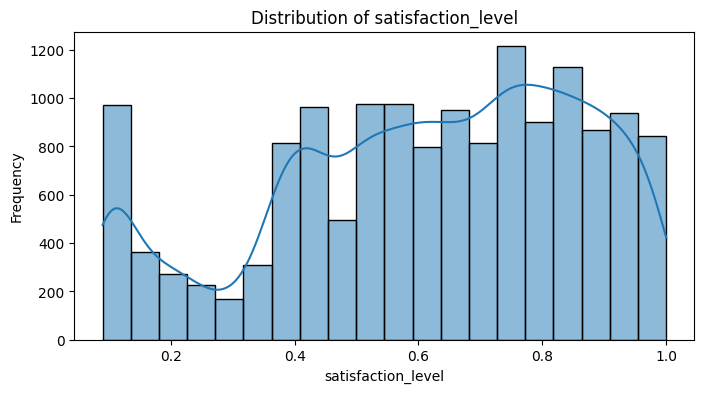

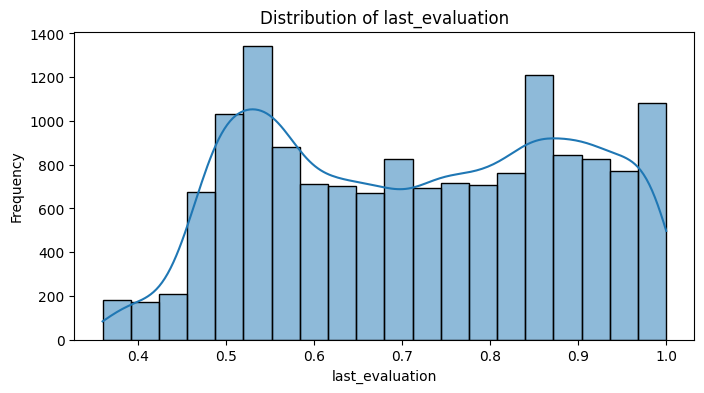

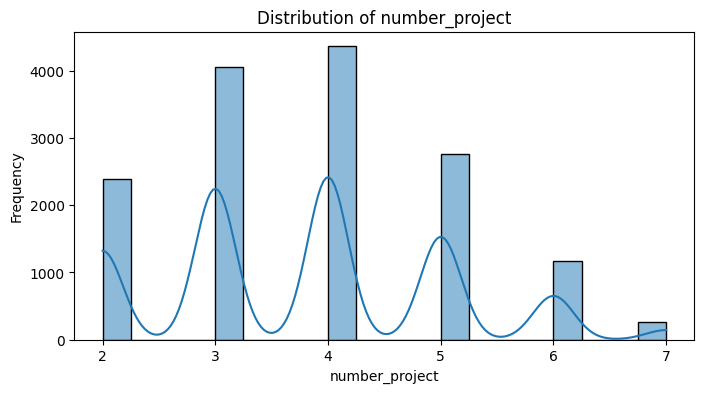

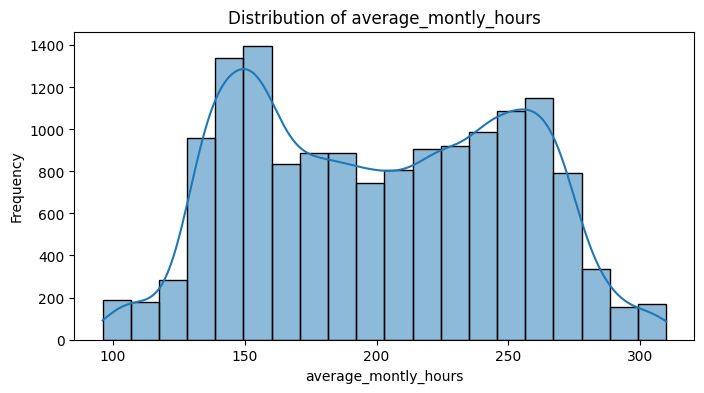

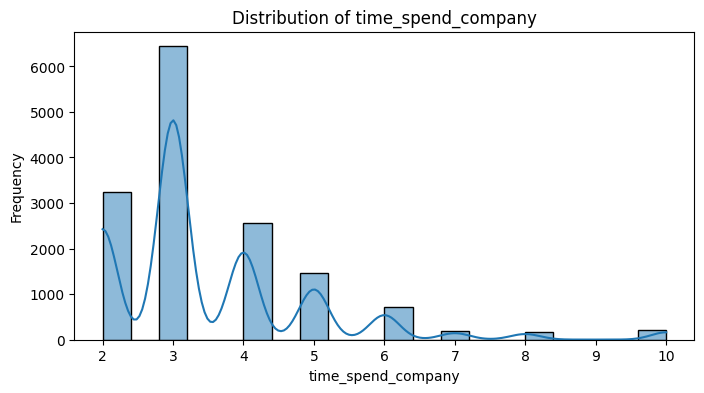

In [6]:
# Numerical features
numerical_columns = ['satisfaction_level', 'last_evaluation', 'number_project',
                     'average_montly_hours', 'time_spend_company']
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], kde=True, bins=20)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()


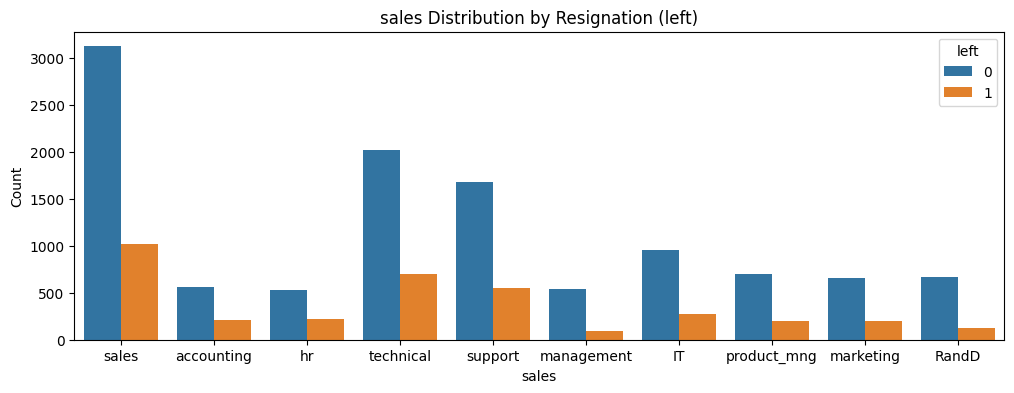

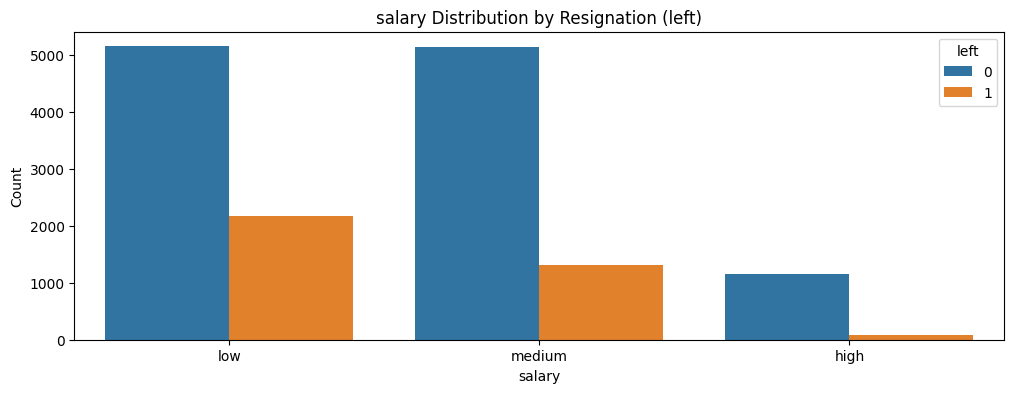

In [7]:
# Categorical features
categorical_columns = ['sales', 'salary']

for column in categorical_columns:
    plt.figure(figsize=(12, 4))
    sns.countplot(data=data, x=column, hue="left")  # "left" indicates resignation
    plt.title(f"{column} Distribution by Resignation (left)")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

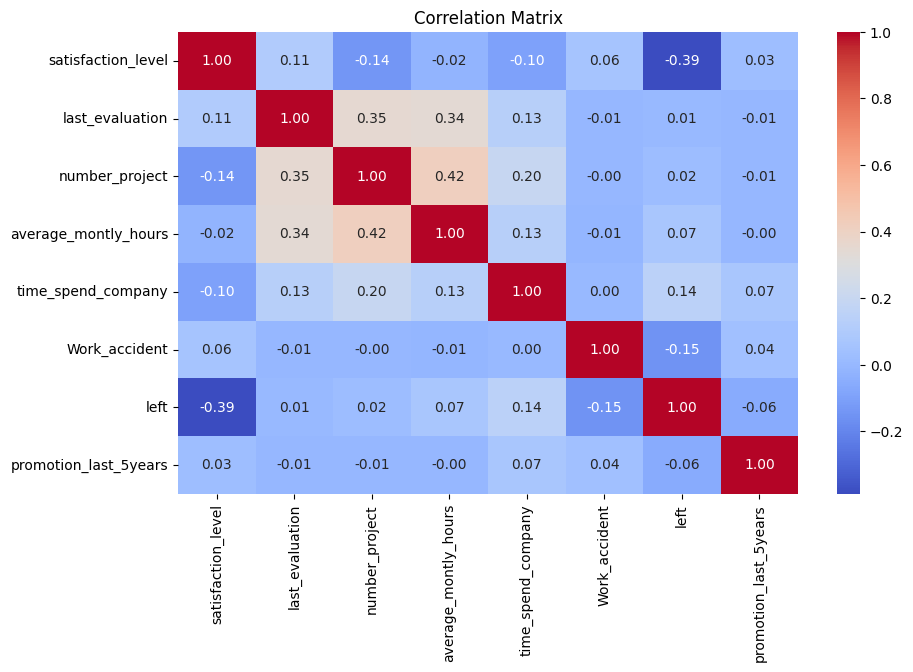

In [8]:
# Correlation heatmap for numerical features
ndata = data[data.columns[:-2]]
# print(ndata.head())

plt.figure(figsize=(10, 6))
correlation_matrix = ndata.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


1.4: Check for Data Quality Issues


Number of duplicate rows: 3008


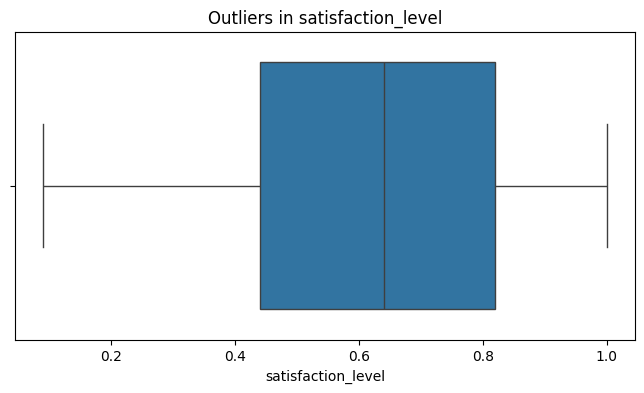

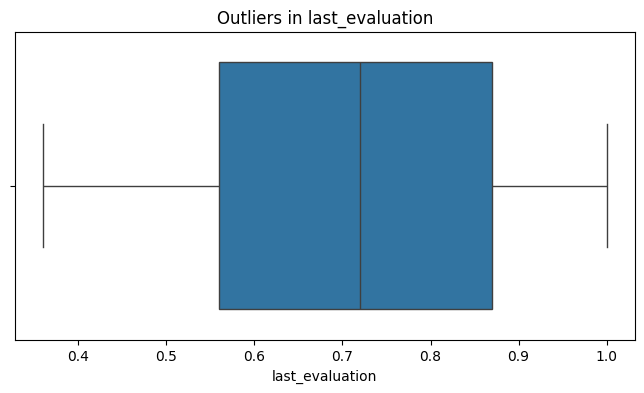

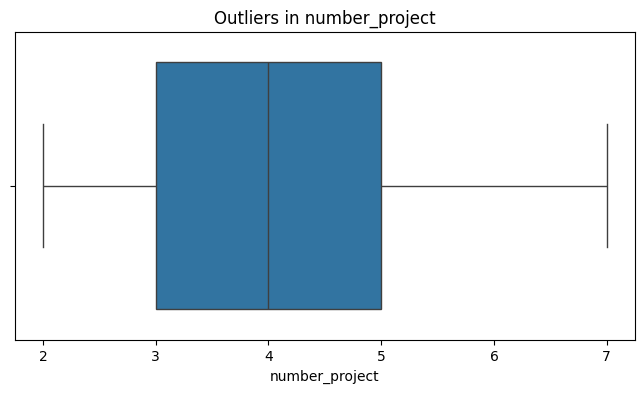

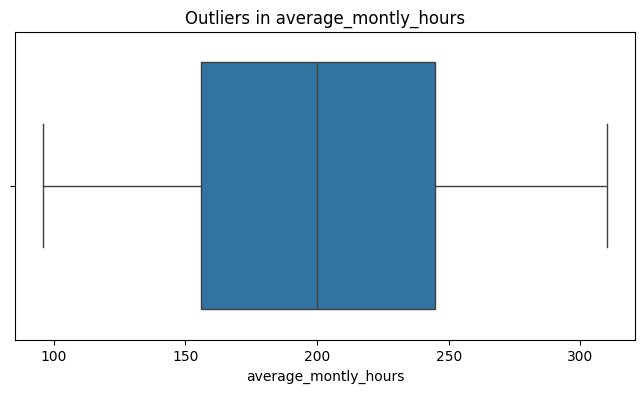

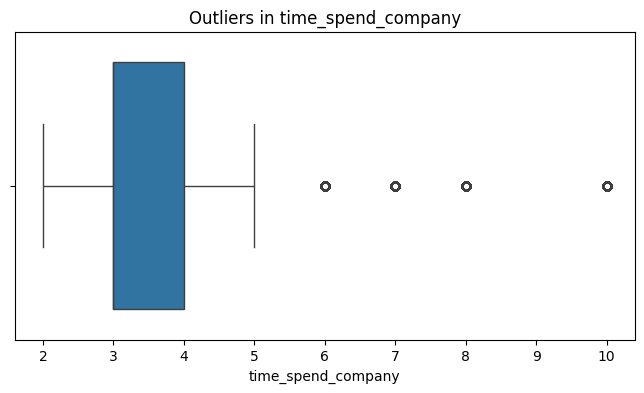

In [9]:
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Outliers detection (boxplot)
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[column])
    plt.title(f"Outliers in {column}")
    plt.xlabel(column)
    plt.show()


In [10]:
# Check for inconsistencies in categorical columns
print("\nChecking for inconsistent values in categorical columns:")
for column in categorical_columns:
    print(f"Unique values in '{column}':")
    print(data[column].unique())


Checking for inconsistent values in categorical columns:
Unique values in 'sales':
['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
Unique values in 'salary':
['low' 'medium' 'high']


1.5: Target Variable Analysis

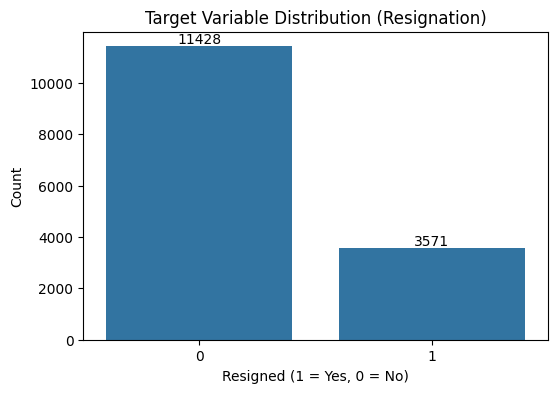

In [11]:
# Check the balance of the target variable (left)
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=data, x="left")
plt.title("Target Variable Distribution (Resignation)")
plt.xlabel("Resigned (1 = Yes, 0 = No)")
plt.ylabel("Count")

# Add count labels on top of each bar
for i in ax.containers:
    ax.bar_label(i)

plt.show()

# Step 2: Data Wrangling

2.1 Handle Missing Values

In [12]:
# Check for missing values
print("\nMissing Values per Column:")
print(data.isnull().sum())

# sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
# plt.title("Missing Values Heatmap")
# plt.show()

#There is no missing value


Missing Values per Column:
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


2.2 Feature Engineering and Encoding

In [13]:
# Encoding categorical variables

encoder = OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(data[categorical_columns])

encoded_columns = encoder.get_feature_names_out(categorical_columns)
encoded_data = pd.DataFrame(encoded_array, columns=encoded_columns)
encoded_data.index = data.index

# Drop original categorical columns and concatenate with encoded columns
data_encoded = data.drop(columns=categorical_columns).reset_index(drop=True)
data_final = pd.concat([data_encoded, encoded_data], axis=1)

print("\nData After Encoding:")
print(data_final.head())


Data After Encoding:
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales_IT  \
0                   3              0     1                      0       0.0   
1                   6              0     1                      0       0.0   
2                   4              0     1                      0       0.0   
3                   5              0     1                      0       0.0   
4                   3              0     1                      0       0.0   

   sales_RandD  ...  s

In [14]:
# Save the encoder
joblib.dump(encoder, f'../artifacts/encoders/encoder_{datetime.now().strftime("%Y%m%d_%H%M%S")}.pkl')
joblib.dump(encoder, '../artifacts/encoders/encoder.pkl')

print("\nEncoder saved to 'artifacts/' directory.")


Encoder saved to 'artifacts/' directory.


2.3 Data Splitting

In [15]:
# Features (X) and Target (y)
X = data_final.drop('left', axis=1)
y = data_final['left']

# Step 1: Split into Training (70%) and Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 2: Split Temp into Validation (15%) and Test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)


Training set: (10499, 20) (10499,)
Validation set: (2250, 20) (2250,)
Test set: (2250, 20) (2250,)


2.4 Scaling Numerical Features

In [16]:
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])
X_val[numerical_columns] = scaler.transform(X_val[numerical_columns])

print("\nScaled Numerical Features in Training Data:")
print(X_train[numerical_columns].head())


Scaled Numerical Features in Training Data:
       satisfaction_level  last_evaluation  number_project  \
9047             0.634516         0.426710       -0.646955   
12494            0.916311         1.652195        0.974719   
12427           -0.251124        -0.682063       -0.646955   
13785           -0.492662        -1.148915        0.163882   
13190            1.439644        -0.506994        0.974719   

       average_montly_hours  time_spend_company  
9047               1.448411           -1.032532  
12494              0.346103            1.023978  
12427             -0.415493            0.338475  
13785             -0.796290            2.394985  
13190              1.147781           -1.032532  


In [17]:
# Save the scaler
joblib.dump(scaler, f'../artifacts/scalers/scaler_{datetime.now().strftime("%Y%m%d_%H%M%S")}.pkl')
joblib.dump(scaler, '../artifacts/scalers/scaler.pkl')

print("\nScaler saved to 'artifacts/' directory.")


Scaler saved to 'artifacts/' directory.


2.5 Address Class Imbalance

In [18]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nClass Distribution After SMOTE:")
print(y_train_resampled.value_counts())


Class Distribution After SMOTE:
left
0    7999
1    7999
Name: count, dtype: int64


2.6 Outlier Detection and Handling

Outlier handling complete.


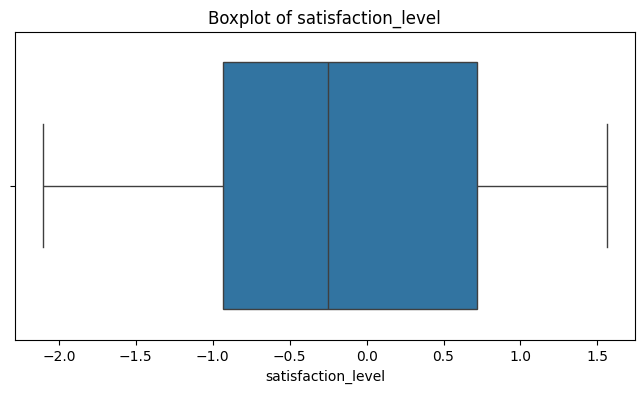

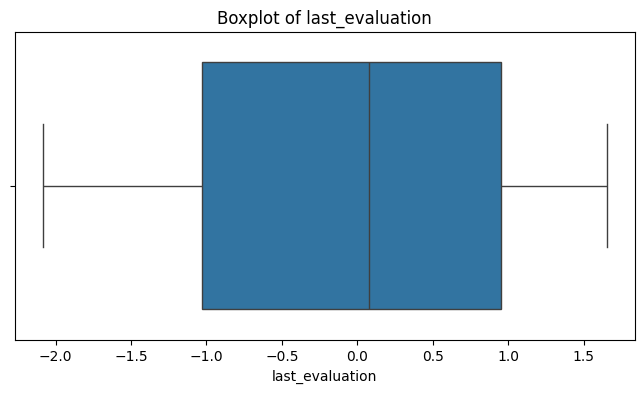

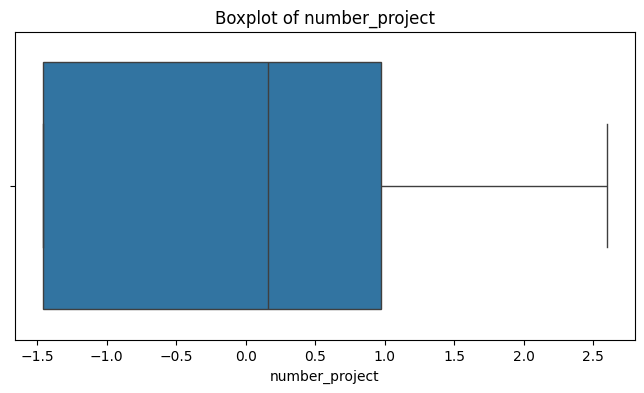

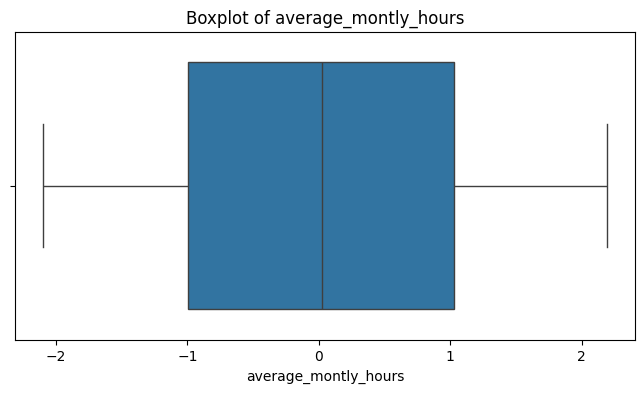

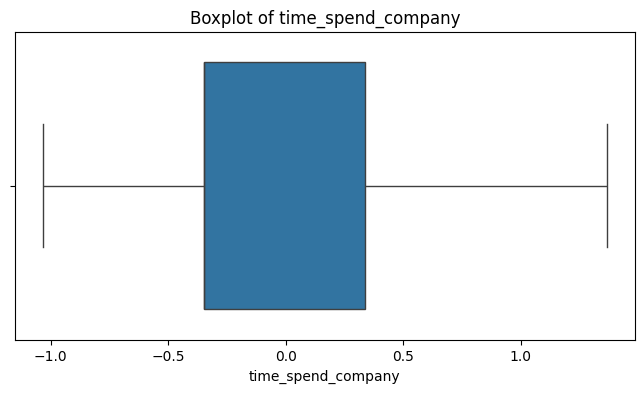

In [19]:
for col in numerical_columns:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile range

    # Define thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap/Floor outliers in the training set
    X_train_resampled[col] = X_train_resampled[col].clip(lower=lower_bound, upper=upper_bound)


print("Outlier handling complete.")
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=X_train_resampled[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Step 3: Model Engineering

3.1 Baseline Model

In [20]:
import os
import numpy as np
import neptune
import shap
from dotenv import load_dotenv
from scipy.stats import randint
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             ConfusionMatrixDisplay, f1_score, precision_score,
                             recall_score, roc_auc_score, roc_curve, make_scorer)
from sklearn.model_selection import (GridSearchCV, RandomizedSearchCV, cross_val_score)
from neptune.types import File 

/home/luca/miniconda3/envs/py311/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
# Load environment variables from the .env file
load_dotenv()
api_token = os.getenv('NEPTUNE_API_TOKEN')
print(api_token)

# Neptune Initialization
run = neptune.init_run(
    project='440MI/AttritionDeskApp',  
    api_token=api_token,
    tags=["baseline"],
    name="Logistic Regression"
)

# Initialize models
log_reg = LogisticRegression(random_state=42, max_iter=1000)

parameters = {
    'model_type': 'Logistic Regression',
    'random_state': 42,
    'max_iter': 1000
}

# Register model parameters
run["parameters"] = parameters

# Train models
print("Training Logistic Regression...")
log_reg.fit(X_train_resampled, y_train_resampled)

# Evaluate models on validation data
def evaluate_model(model, X_val, y_val, model_name):
    print(f"\nEvaluating {model_name}...")
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_prob)

    # Log classification report
    report = classification_report(y_val, y_pred)
    print("Classification Report:")
    print(report)

    # Log AUC score
    auc = roc_auc_score(y_val, y_prob)
    print(f"AUC-ROC: {auc:.4f}")

    # Plot and log ROC Curve
    fig_roc, ax_roc = plt.subplots(figsize=(8, 6))
    fpr, tpr, _ = roc_curve(y_val, y_prob)
    ax_roc.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.4f})')
    ax_roc.plot([0, 1], [0, 1], 'k--')
    ax_roc.set_xlabel('False Positive Rate')
    ax_roc.set_ylabel('True Positive Rate')
    ax_roc.set_title(f'ROC Curve - {model_name}')
    ax_roc.legend()
    run[f"charts/roc_curve"].upload(fig_roc)
    plt.close(fig_roc)

    # Plot and log Confusion Matrix
    fig_cm, ax_cm = plt.subplots(figsize=(8, 6))
    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=ax_cm, cmap='Blues')
    ax_cm.set_title(f'Confusion Matrix - {model_name}')
    run[f"charts/confusion_matrix"].upload(fig_cm)
    plt.close(fig_cm)

    # Log metrics
    metrics = {
        "confusion_matrix": cm.tolist(),
        "true_positives": cm[1][1],
        "false_positives": cm[0][1],
        "true_negatives": cm[0][0],
        "false_negatives": cm[1][0],
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "auc": auc
    }
    run["metrics"] = metrics

# Evaluate model
evaluate_model(log_reg, X_val, y_val, "Logistic_Regression")

# Stop the Neptune run
run.stop()


[neptune] [warning] NeptuneWarning: By default, these monitoring options are disabled in interactive sessions: 'capture_stdout', 'capture_stderr', 'capture_traceback', 'capture_hardware_metrics'. You can set them to 'True' when initializing the run and the monitoring will continue until you call run.stop() or the kernel stops. NOTE: To track the source files, pass their paths to the 'source_code' argument. For help, see: https://docs.neptune.ai/logging/source_code/


eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJlN2UwYmVjYy03NWVlLTQwNmEtYTI5OS1mZTQ1MTc3Zjc0YzEifQ==
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/440MI/AttritionDeskApp/e/AT-181
Training Logistic Regression...

Evaluating Logistic_Regression...
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.78      0.85      1714
           1       0.54      0.83      0.65       536

    accuracy                           0.79      2250
   macro avg       0.74      0.81      0.75      2250
weighted avg       0.84      0.79      0.80      2250

AUC-ROC: 0.8370
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Waiting for the remaining 13 operations to synchronize with Neptune. Do not kill this process.


[neptune] [warning] NeptuneUnsupportedType: You're attempting to log a type that is not directly supported by Neptune (<class 'list'>).
        Convert the value to a supported type, such as a string or float, or use stringify_unsupported(obj)
        for dictionaries or collections that contain unsupported values.
        For more, see https://docs.neptune.ai/help/value_of_unsupported_type


[neptune] [info   ] All 13 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/440MI/AttritionDeskApp/e/AT-181/metadata


3.2 Model Selection

In [22]:
######## Random Forest #########
# Initialize Neptune run
run = neptune.init_run(
    project='440MI/AttritionDeskApp',  
    api_token=api_token,
    tags=["baseline"],
    name="Random Forest"
)

rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)

print("Training Random Forest...")
rf_clf.fit(X_train_resampled, y_train_resampled)

# Evaluate Random_Forest
evaluate_model(rf_clf, X_val, y_val, "Random_Forest")
print("\nTraining complete.")

# Stop Neptune run
run.stop()

######## XGBoost #########
# Initialize Neptune run
run = neptune.init_run(
    project='440MI/AttritionDeskApp',  
    api_token=api_token,
    tags=["baseline"],
    name="XGBoost"
)

xgb_clf = XGBClassifier(random_state=42, eval_metric='logloss')

print("Training XGBoost...")
xgb_clf.fit(X_train_resampled, y_train_resampled)

# Evaluate XGBoost
evaluate_model(xgb_clf, X_val, y_val, "XGBoost")

print("\nTraining complete.")

# Stop Neptune run
run.stop()


[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/440MI/AttritionDeskApp/e/AT-182


Training Random Forest...

Evaluating Random_Forest...
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1714
           1       0.99      0.97      0.98       536

    accuracy                           0.99      2250
   macro avg       0.99      0.98      0.99      2250
weighted avg       0.99      0.99      0.99      2250

AUC-ROC: 0.9928

Training complete.
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Waiting for the remaining 10 operations to synchronize with Neptune. Do not kill this process.
[neptune] [info   ] All 10 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/440MI/AttritionDeskApp/e/AT-182/metadata
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/440MI/AttritionDeskApp/e/AT-183
Training XGBoost...

Evaluating XGBoost

3.3 Hyperparameter Tuning

In [23]:
# Initialize Neptune run for Grid Search
run = neptune.init_run(
    project='440MI/AttritionDeskApp',  
    api_token=api_token,
    tags=["random_forest", "grid_search", "hyperparameter_tuning"],
    name="Random Forest - Grid Search"
)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Log hyperparameter search space
run["hyperparameters/search_space"] = param_grid

# Create GridSearchCV object
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit to the training data
print("Starting Grid Search...")
grid_search.fit(X_train_resampled, y_train_resampled)

# Log best parameters and score
best_params_grid = grid_search.best_params_
best_score_grid = grid_search.best_score_
print(f"Best Parameters (Grid Search): {best_params_grid}")
print(f"Best Cross-validation Score: {best_score_grid:.4f}")

run["grid_search/best_parameters"] = best_params_grid
run["grid_search/best_cv_score"] = best_score_grid

# Get the best model
best_rf_model_grid = grid_search.best_estimator_

# Log all CV results
cv_results = pd.DataFrame(grid_search.cv_results_)
for idx, row in cv_results.iterrows():
    params = row['params']
    mean_score = row['mean_test_score']
    std_score = row['std_test_score']
    run[f"grid_search/cv_results/{idx}"] = {
        "parameters": params,
        "mean_score": mean_score,
        "std_score": std_score
    }

# Evaluate the best model using our evaluate_model function
evaluate_model(best_rf_model_grid, X_val, y_val, "RandomForest_GridSearch")

# Create a comparison plot of different parameter combinations
plt.figure(figsize=(12, 6))
plt.errorbar(range(len(cv_results)), 
            cv_results['mean_test_score'], 
            yerr=cv_results['std_test_score'],
            fmt='o')
plt.xlabel('Parameter combination')
plt.ylabel('CV Score')
plt.title('Grid Search Results')
run["grid_search/charts/cv_results"].upload(plt.gcf())
plt.close()

# Stop the run
run.stop()

[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/440MI/AttritionDeskApp/e/AT-184
Starting Grid Search...
Best Parameters (Grid Search): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-validation Score: 0.9883

Evaluating RandomForest_GridSearch...
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1714
           1       0.99      0.97      0.98       536

    accuracy                           0.99      2250
   macro avg       0.99      0.98      0.99      2250
weighted avg       0.99      0.99      0.99      2250

AUC-ROC: 0.9924


[neptune] [warning] NeptuneUnsupportedType: You're attempting to log a type that is not directly supported by Neptune (<class 'NoneType'>).
        Convert the value to a supported type, such as a string or float, or use stringify_unsupported(obj)
        for dictionaries or collections that contain unsupported values.
        For more, see https://docs.neptune.ai/help/value_of_unsupported_type


[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Waiting for the remaining 474 operations to synchronize with Neptune. Do not kill this process.
[neptune] [info   ] All 474 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/440MI/AttritionDeskApp/e/AT-184/metadata


In [24]:
# Initialize Neptune run for Random Search
run = neptune.init_run(
    project='440MI/AttritionDeskApp',  
    api_token=api_token,
    tags=["random_forest", "random_search", "hyperparameter_tuning"],
    name="Random Forest - Random Search"
)

# Define the parameter distributions
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
}

# Log hyperparameter search space
run["hyperparameters/search_space"] = {
    "n_estimators": "randint(50, 200)",
    "max_depth": "[None, 10, 20]",
    "min_samples_split": "randint(2, 10)",
    "min_samples_leaf": "randint(1, 4)"
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(rf_clf, param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)

# Fit to the training data
print("Starting Random Search...")
random_search.fit(X_train_resampled, y_train_resampled)

# Log best parameters and score
best_params_random = random_search.best_params_
best_score_random = random_search.best_score_
print(f"Best Parameters (Random Search): {best_params_random}")
print(f"Best Cross-validation Score: {best_score_random:.4f}")

run["random_search/best_parameters"] = best_params_random
run["random_search/best_cv_score"] = best_score_random

# Get the best model
best_rf_model_random = random_search.best_estimator_

# Log all CV results
cv_results = pd.DataFrame(random_search.cv_results_)
for idx, row in cv_results.iterrows():
    params = row['params']
    mean_score = row['mean_test_score']
    std_score = row['std_test_score']
    run[f"random_search/cv_results/{idx}"] = {
        "parameters": params,
        "mean_score": mean_score,
        "std_score": std_score
    }

# Evaluate the best model using our evaluate_model function
evaluate_model(best_rf_model_random, X_val, y_val, "RandomForest_RandomSearch")

# Create a comparison plot of different parameter combinations
plt.figure(figsize=(12, 6))
plt.errorbar(range(len(cv_results)), 
            cv_results['mean_test_score'], 
            yerr=cv_results['std_test_score'],
            fmt='o')
plt.xlabel('Trial number')
plt.ylabel('CV Score')
plt.title('Random Search Results')
run["random_search/charts/cv_results"].upload(plt.gcf())
plt.close()

# Feature importance for best model
feature_importances = best_rf_model_random.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train_resampled.columns, 
    'Importance': feature_importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance (Best Random Search Model)')
plt.tight_layout()
run["random_search/charts/feature_importance"].upload(plt.gcf())
plt.close()

# Log feature importance values
run["random_search/feature_importance"] = importance_df.to_dict(orient='records')

# Stop the run
run.stop()

[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/440MI/AttritionDeskApp/e/AT-185


Starting Random Search...
Best Parameters (Random Search): {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 164}
Best Cross-validation Score: 0.9885

Evaluating RandomForest_RandomSearch...
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1714
           1       0.98      0.97      0.98       536

    accuracy                           0.99      2250
   macro avg       0.99      0.98      0.98      2250
weighted avg       0.99      0.99      0.99      2250

AUC-ROC: 0.9921
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Waiting for the remaining 74 operations to synchronize with Neptune. Do not kill this process.
[neptune] [info   ] All 74 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/440MI/AttritionDeskApp/e/AT-185/metadata


In [25]:
# Initialize Neptune run
run = neptune.init_run(
    project='440MI/AttritionDeskApp',  
    api_token=api_token,
    tags=["random_forest", "optuna", "bayesian_optimization"],
    name="Random Forest - Optuna Optimization"
)

# Log the search space
search_space = {
    "n_estimators": "int: [50, 200]",
    "max_depth": "int: [10, 20, 30]",
    "min_samples_split": "int: [2, 10]",
    "min_samples_leaf": "int: [1, 4]"
}
run["hyperparameters/search_space"] = search_space

def objective(trial):
    # Suggest values for hyperparameters
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 10, 30, step=10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4)
    }
    
    # Create and evaluate model
    rf_clf = RandomForestClassifier(**params, random_state=42)
    scores = cross_val_score(rf_clf, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
    
    # Log trial results to Neptune
    run[f"trials/{trial.number}/parameters"] = params
    run[f"trials/{trial.number}/cv_scores"] = scores.tolist()
    run[f"trials/{trial.number}/mean_cv_score"] = scores.mean()
    run[f"trials/{trial.number}/std_cv_score"] = scores.std()
    
    return scores.mean()

# Create and run Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Log best results
run["best_trial/parameters"] = study.best_params
run["best_trial/value"] = study.best_value

# Create best model with optimal parameters
best_rf_model_optuna = RandomForestClassifier(**study.best_params, random_state=42)
best_rf_model_optuna.fit(X_train_resampled, y_train_resampled)

# Evaluate best model
evaluate_model(best_rf_model_optuna, X_val, y_val, "RandomForest_Optuna")

# Plot optimization history
plt.figure(figsize=(10, 6))
trials_df = study.trials_dataframe()
plt.plot(trials_df['number'], trials_df['value'], 'o-')
plt.xlabel('Trial number')
plt.ylabel('Accuracy score')
plt.title('Optuna Optimization History')
run["charts/optimization_history"].upload(plt.gcf())
plt.close()

# Plot parameter importances
optuna_importances = optuna.importance.get_param_importances(study)
plt.figure(figsize=(10, 6))
importance_df = pd.DataFrame(list(optuna_importances.items()), 
                           columns=['Parameter', 'Importance'])
plt.bar(importance_df['Parameter'], importance_df['Importance'])
plt.xticks(rotation=45)
plt.title('Hyperparameter Importance')
run["charts/parameter_importance"].upload(plt.gcf())
plt.close()

# Log parameter importances
run["parameter_importance"] = optuna_importances

# Stop the run
run.stop()


[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/440MI/AttritionDeskApp/e/AT-186


[I 2025-01-26 22:13:25,738] A new study created in memory with name: no-name-3a1245f5-ad4a-4d9a-ba88-57f7ca12c867
[I 2025-01-26 22:13:28,924] Trial 0 finished with value: 0.9719344130978431 and parameters: {'n_estimators': 104, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.9719344130978431.
[I 2025-01-26 22:13:30,984] Trial 1 finished with value: 0.9837483197874336 and parameters: {'n_estimators': 55, 'max_depth': 30, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.9837483197874336.
[I 2025-01-26 22:13:35,791] Trial 2 finished with value: 0.97762269459206 and parameters: {'n_estimators': 135, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.9837483197874336.
[I 2025-01-26 22:13:35,469] Trial 3 finished with value: 0.9805604485776804 and parameters: {'n_estimators': 67, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.


Evaluating RandomForest_Optuna...
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1714
           1       0.99      0.96      0.97       536

    accuracy                           0.99      2250
   macro avg       0.99      0.98      0.98      2250
weighted avg       0.99      0.99      0.99      2250

AUC-ROC: 0.9915
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Waiting for the remaining 27 operations to synchronize with Neptune. Do not kill this process.
[neptune] [info   ] All 27 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/440MI/AttritionDeskApp/e/AT-186/metadata


In [26]:
# Define each parameter set
params_base = {'n_estimators': 100}  # default parameters
params_optuna = {'n_estimators': 132, 'max_depth': 30, 'min_samples_split': 7, 'min_samples_leaf': 1}
params_random = {'n_estimators': 54, 'max_depth': 20, 'min_samples_split': 3, 'min_samples_leaf': 2}
params_grid = {'n_estimators': 200, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}

# Initialize models with the different parameter sets
models = {
    "Base RF": RandomForestClassifier(**params_base, random_state=42),
    "Optuna": RandomForestClassifier(**params_optuna, random_state=42),
    "Randomized Search": RandomForestClassifier(**params_random, random_state=42),
    "Grid Search": RandomForestClassifier(**params_grid, random_state=42),
}

# Initialize Neptune run for model comparison
run = neptune.init_run(
    project='440MI/AttritionDeskApp',
    api_token=api_token,
    tags=["random_forest", "model_comparison"],
    name="Random Forest - Models Comparison"
)

# Log parameters for each model
run["parameters"] = {
    "Base RF": params_base,
    "Optuna": params_optuna,
    "Randomized Search": params_random,
    "Grid Search": params_grid
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    print(f"\nTraining and evaluating {name}...")
    
    # Train the model
    model.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_pred_proba)
    }
    results[name] = metrics
    
    # Log metrics to Neptune
    run[f"models/{name}/metrics"] = metrics
    
    # Plot and log ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {metrics["ROC AUC"]:.3f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend()
    run[f"models/{name}/charts/roc_curve"].upload(plt.gcf())
    plt.close()
    
    # Plot and log confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    run[f"models/{name}/charts/confusion_matrix"].upload(plt.gcf())
    plt.close()

# Create and display comparison DataFrame
results_df = pd.DataFrame(results).T
print("\nModel Comparison:")
print(results_df)

# Log comparison table
run["results/comparison_table"] = results_df.to_dict()

# Stop the run
run.stop()

[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/440MI/AttritionDeskApp/e/AT-187

Training and evaluating Base RF...

Training and evaluating Optuna...

Training and evaluating Randomized Search...

Training and evaluating Grid Search...

Model Comparison:
                   Accuracy  Precision    Recall  F1 Score   ROC AUC
Base RF            0.987556   0.988439  0.958879  0.973435  0.991704
Optuna             0.985333   0.990234  0.947664  0.968481  0.991413
Randomized Search  0.982667   0.980620  0.945794  0.962892  0.992013
Grid Search        0.986667   0.986513  0.957009  0.971537  0.991451
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Waiting for the remaining 60 operations to synchronize with Neptune. Do not kill this process.
[neptune] [info   ] All 60 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

3.4 Model Evaluation

In [27]:
# Initialize Neptune run for model comparison
run = neptune.init_run(
    project='440MI/AttritionDeskApp',
    api_token=api_token,
    tags=["random_forest", "model_comparison"],
    name="Random Forest - Cross Validation"
)

# Evaluate both models
models = {
    'Grid Search Model': best_rf_model_grid,
    'Random Forest Model': rf_clf
}

for model_name, model in models.items():
    print(f"\n=== Evaluation for {model_name} ===")
    
    # Predictions on the test set
    y_pred = model.predict(X_test)

    # Metrics
    print("\nModel Evaluation Metrics:")
    classification_rep = classification_report(y_test, y_pred)
    print(classification_rep)
    roc_auc = roc_auc_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print(f"Recall: {recall:.4f}")

    # Log metrics to Neptune
    run[f"evaluation/{model_name}/classification_report"] = classification_rep
    run[f"evaluation/{model_name}/roc_auc"] = roc_auc
    run[f"evaluation/{model_name}/recall"] = recall

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Left', 'Left'])
    disp.plot(values_format='d')
    plt.title(f'Confusion Matrix - {model_name}')
    
    # Save confusion matrix plot to Neptune
    run[f"evaluation/{model_name}/confusion_matrix"].upload(File.as_image(plt.gcf()))
    plt.close()

    # Cross-Validation (on the training set)
    cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=10, scoring='accuracy')
    print(f"\nCross-Validation Scores: {cv_scores}")
    cv_mean = cv_scores.mean()
    print(f"Average Cross-Validation Score: {cv_mean:.4f}")
    
    # Log cross-validation scores
    run[f"evaluation/{model_name}/cv_scores"] = cv_scores.tolist()
    run[f"evaluation/{model_name}/cv_mean"] = cv_mean

    # Calculate recall using cross-validation
    recall_scorer = make_scorer(recall_score)
    recall_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring=recall_scorer)
    print(f"Recall for each fold: {recall_scores}")
    recall_mean = recall_scores.mean()
    print(f"Average recall: {recall_mean:.4f}")
    
    # Log recall scores
    run[f"evaluation/{model_name}/recall_scores"] = recall_scores.tolist()
    run[f"evaluation/{model_name}/recall_mean"] = recall_mean
    
    # Plot cross-validation scores distribution
    plt.figure(figsize=(10, 6))
    plt.hist(cv_scores, bins=10, edgecolor='black')
    plt.title(f'Cross-Validation Scores Distribution - {model_name}')
    plt.xlabel('Accuracy Score')
    plt.ylabel('Frequency')
    run[f"evaluation/{model_name}/cv_distribution"].upload(File.as_image(plt.gcf()))
    plt.close()
    
    print("\n" + "="*50)

# Stop the run
run.stop()

[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/440MI/AttritionDeskApp/e/AT-188

=== Evaluation for Grid Search Model ===

Model Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1715
           1       0.99      0.96      0.97       535

    accuracy                           0.99      2250
   macro avg       0.99      0.98      0.98      2250
weighted avg       0.99      0.99      0.99      2250

ROC AUC Score: 0.9765
Recall: 0.9570

Cross-Validation Scores: [0.985625   0.97875    0.98125    0.9925     0.996875   0.993125
 0.990625   0.994375   0.9931207  0.99562226]
Average Cross-Validation Score: 0.9902
Recall for each fold: [0.964375   0.97375    0.9925     0.98561601 0.99      ]
Average recall: 0.9812


=== Evaluation for Random Forest Model ===

Model Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

3.5 Feature Importance and Model Interpretability 

In [28]:
# Initialize Neptune run
run = neptune.init_run(
    project='440MI/AttritionDeskApp',
    api_token=api_token,
    name="Feature Importance Analysis",
    tags=["feature-importance", "random-forest"]
)

best_rf_model = best_rf_model_grid

# Feature Importance for Random Forest
feature_importances = best_rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train_resampled.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(importance_df)

# Log feature importance to Neptune
run["feature_importance/table"] = importance_df.to_dict()

# Create and log feature importance plot
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance')
plt.tight_layout()
run["feature_importance/plot"].upload(File.as_image(plt.gcf()))
plt.close()

run.stop()


[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/440MI/AttritionDeskApp/e/AT-189

Feature Importance:
                  Feature  Importance
0      satisfaction_level    0.261816
4      time_spend_company    0.223413
2          number_project    0.168786
3    average_montly_hours    0.147265
1         last_evaluation    0.125386
5           Work_accident    0.019757
18             salary_low    0.009088
17            salary_high    0.007387
16        sales_technical    0.006390
14            sales_sales    0.005887
19          salary_medium    0.004904
15          sales_support    0.004525
9        sales_accounting    0.002415
8             sales_RandD    0.002305
6   promotion_last_5years    0.002252
11       sales_management    0.002109
7                sales_IT    0.002035
10               sales_hr    0.001909
12        sales_marketing    0.001200
13      sales_product_mng    0.001170
[neptune] [info   ] Shutting down background jobs, please wait a mom

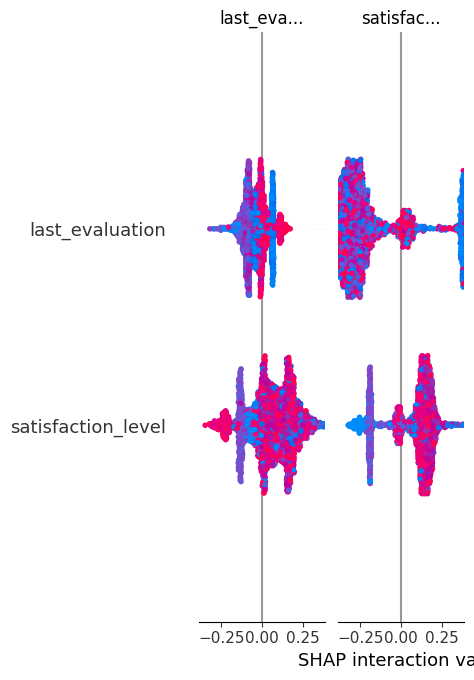

In [29]:
# Create an explainer object (using TreeExplainer for tree-based models)
explainer = shap.TreeExplainer(best_rf_model)

# Calculate SHAP values for a subset of the data (e.g., the test set)
shap_values = explainer.shap_values(X_test)

# Summary plot (shows global feature importance and impact on predictions)
shap.summary_plot(shap_values, X_test)

# Force plot (shows individual prediction explanations)
# shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:]) # for a single prediction


3.6 Export the Best Model

In [31]:
# Save the best model
joblib.dump(best_rf_model, f'../artifacts/models/best_model_{datetime.now().strftime("%Y%m%d_%H%M%S")}.pkl')
joblib.dump(best_rf_model, '../artifacts/models/best_model.pkl')

print("\nBest model saved to 'artifacts/' directory.")



Best model saved to 'artifacts/' directory.
